In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Supply_Chain_Dataset.csv")
data

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.80800554,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29.0,46.279879,Pending,0.226410361,Road,Route B,187.7520755
1,skincare,SKU1,14.84352328,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30.0,33.616769,Pending,4.854068026,Road,Route B,503.0655791
2,haircare,SKU2,11.31968329,34,NAN,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27.0,30.688019,Pending,4.580592619,Air,Route C,141.9202818
3,skincare,SKU3,61.16334302,68,NaN,NAN,Non-binary,23,13,59,...,Kolkata,24,937,18.0,35.624741,Fail,4.746648621,Rail,Route A,254.7761592
4,skincare,SKU4,4.805496036,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3.0,92.065161,Fail,3.145579523,Air,Route A,923.4406317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.90392722,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26.0,58.890686,Pending,1.21088213,Air,Route A,778.8642414
96,cosmetics,SKU96,24.42313142,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28.0,17.803756,Pending,3.872047681,Road,Route A,NAN
97,haircare,SKU97,3.526111259,56,62,4370.91658,Male,46,19,4,...,Mumbai,10,535,13.0,65.765156,Fail,3.376237835,Road,Route A,540.1324229
98,skincare,SKU98,19.75460487,43,913,8525.95256,Female,53,1,27,...,Chennai,28,581,9.0,5.604691,Pending,2.908122169,Rail,Route A,882.1988635


In [ ]:
missing_values = data.apply(lambda x: sum(x.isna()))
missing_values

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,1
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())
numerical_cols
data[numerical_cols]

,Stock levels,Manufacturing lead time,Manufacturing costs
0,58,29.0,46.279879
1,53,30.0,33.616769
2,1,27.0,30.688019
3,23,18.0,35.624741
4,5,3.0,92.065161
...,...,...,...
95,15,26.0,58.890686
96,67,28.0,17.803756
97,46,13.0,65.765156
98,53,9.0,5.604691


In [ ]:
# Impute categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')
data[categorical_cols]


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Lead times,Order quantities,Shipping times,...,Shipping costs,Supplier name,Location,Lead time,Production volumes,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.80800554,55,802,8661.996792,Non-binary,7,96,4,...,2.956572139,Supplier 3,Mumbai,29,215,Pending,0.226410361,Road,Route B,187.7520755
1,skincare,SKU1,14.84352328,95,736,7460.900065,Female,30,37,2,...,9.716574771,Supplier 3,Mumbai,23,517,Pending,4.854068026,Road,Route B,503.0655791
2,haircare,SKU2,11.31968329,34,NAN,9577.749626,Unknown,10,88,2,...,8.054479262,Supplier 1,Mumbai,12,971,Pending,4.580592619,Air,Route C,141.9202818
3,skincare,SKU3,61.16334302,68,Unknown,NAN,Non-binary,13,59,6,...,1.729568564,Supplier 5,Kolkata,24,937,Fail,4.746648621,Rail,Route A,254.7761592
4,skincare,SKU4,4.805496036,26,871,2686.505152,Non-binary,3,56,8,...,3.890547916,Supplier 1,Delhi,5,414,Fail,3.145579523,Air,Route A,923.4406317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.90392722,65,672,7386.363944,Unknown,14,26,9,...,8.63033887,Supplier 4,Mumbai,18,450,Pending,1.21088213,Air,Route A,778.8642414
96,cosmetics,SKU96,24.42313142,29,324,7698.424766,Non-binary,2,32,3,...,5.352878044,Supplier 3,Mumbai,28,648,Pending,3.872047681,Road,Route A,NAN
97,haircare,SKU97,3.526111259,56,62,4370.91658,Male,19,4,9,...,7.904845611,Supplier 4,Mumbai,10,535,Fail,3.376237835,Road,Route A,540.1324229
98,skincare,SKU98,19.75460487,43,913,8525.95256,Female,1,27,7,...,1.409801095,Supplier 5,Chennai,28,581,Pending,2.908122169,Rail,Route A,882.1988635


In [ ]:
# prompt: Numerical Features: Imputed using the median to mitigate outlier
# effects.
# Categorical Features: Assigned a placeholder value "Unknown" for
# missing categories, ensuring these entries were preserved for analysis.
# code for above statement

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset (replace 'Supply_Chain_Dataset.csv' with your actual file path)
data = pd.read_csv("Supply_Chain_Dataset.csv")

# Identify numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Impute numerical features with the median
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Identify categorical features
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute categorical features with "Unknown"
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

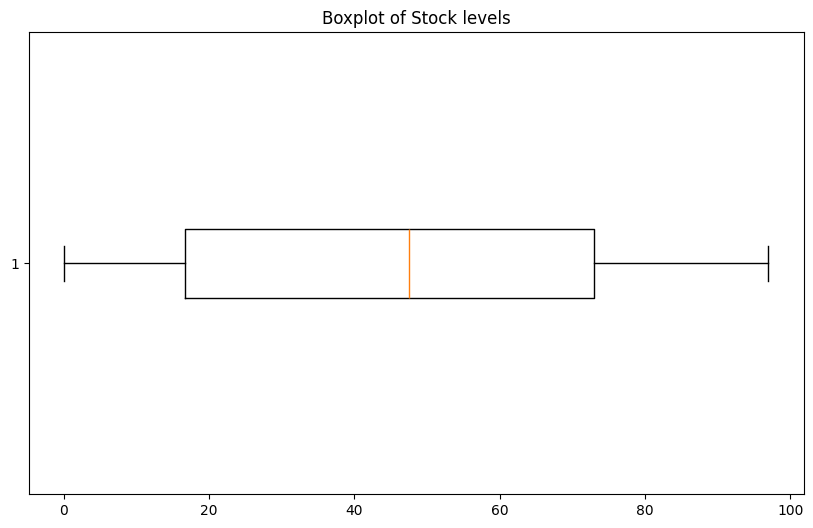

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Calculate Z-scores for numerical features
for col in numerical_cols:
    data[f'{col}_Zscore'] = np.abs((data[col] - data[col].mean()) / data[col].std())

# Detection: Identify outliers using Z-score (e.g., Z-score > 3)
outliers = data[numerical_cols][data[f'{numerical_cols[0]}_Zscore'] > 3]
outliers

# Winsorization (capping at the 95th percentile)
for col in numerical_cols:
    upper_limit = data[col].quantile(0.95)
    data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])
    data[col]

# Example: Boxplot visualization for a specific numerical feature
plt.figure(figsize=(10, 6))
plt.boxplot(data[numerical_cols[0]], vert=False)
plt.title(f'Boxplot of {numerical_cols[0]}')
plt.show()



In [ ]:
#Checking for Missing Values
missing_values = data.apply(lambda x: sum(x.isna()))
missing_values
#Data Type Verification
data_types = data.dtypes
print(data_types)
#  SKU Analysis
# Checking if SKUs are unique
unique_skus = len(data['SKU'].unique()) == len(data)
print(unique_skus)


Product type                       object
SKU                                object
Price                              object
Availability                       object
Number of products sold            object
Revenue generated                  object
Customer demographics              object
Stock levels                      float64
Lead times                         object
Order quantities                   object
Shipping times                     object
Shipping carriers                  object
Shipping costs                     object
Supplier name                      object
Location                           object
Lead time                          object
Production volumes                 object
Manufacturing lead time           float64
Manufacturing costs               float64
Inspection results                 object
Defect rates                       object
Transportation modes               object
Routes                             object
Costs                             

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Category' is the column with missing values

# Frequent Category Imputation
data['Number of products sold'].fillna(data['Number of products sold'].mode()[0], inplace=True)

# "Missing" as a Category
data['Number of products sold'].fillna('Unknown', inplace=True)
print(data.head())

  Product type   SKU        Price Availability Number of products sold  \
0     haircare  SKU0  69.80800554           55                     802   
1     skincare  SKU1  14.84352328           95                     736   
2     haircare  SKU2  11.31968329           34                     NAN   
3     skincare  SKU3  61.16334302           68                 Unknown   
4     skincare  SKU4  4.805496036           26                     871   

  Revenue generated Customer demographics  Stock levels Lead times  \
0       8661.996792            Non-binary          58.0          7   
1       7460.900065                Female          53.0         30   
2       9577.749626               Unknown           1.0         10   
3               NAN            Non-binary          23.0         13   
4       2686.505152            Non-binary           5.0          3   

  Order quantities  ... Manufacturing lead time Manufacturing costs  \
0               96  ...                    29.0           46.27

<ipython-input-9-57aa3be29e29>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of products sold'].fillna(data['Number of products sold'].mode()[0], inplace=True)
<ipython-input-9-57aa3be29e29>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
data_encoded = data.copy()

# Identify categorical features
categorical_cols = data_encoded.select_dtypes(include=['object']).columns

# Encode categorical features using Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])

# Now, fit the IsolationForest model on the encoded data
clf = IsolationForest(contamination=0.01)  # 1% of data as outliers
clf.fit(data_encoded)
outlier_predictions = clf.predict(data_encoded)

# Identify outliers
outliers = data_encoded[outlier_predictions == -1]
outliers

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Stock levels_Zscore,Manufacturing lead time_Zscore,Manufacturing costs_Zscore
2,1,12,1,20,92,94,3,1.0,1,56,...,27.0,30.688019,2,91,0,2,6,1.490945,1.370505,0.572017


In [ ]:
df= data

In [ ]:
import pandas as pd

def resolve_duplicates_and_inconsistencies(df):

    # 1. Handle Duplicate Records
    # Corrected column names to match the DataFrame
    key_columns = ['Product type', 'Supplier name', 'SKU']
    df = df.drop_duplicates(subset=key_columns, keep='first')

    # 2. Handle Inconsistencies in Categorical Features
    # 2.1 Standardize categorical values (e.g., case, spaces)
    # Corrected column names to match the DataFrame
    for col in ['Product type', 'Supplier name', 'Shipping carriers', 'Transportation modes', 'Inspection results']:
        df[col] = df[col].str.strip().str.lower()


    # ... (rest of the function remains the same) ...

    return df

# Example Usage:
# Assuming 'data' is your supply chain data DataFrame
df_clean = resolve_duplicates_and_inconsistencies(data)

print("Cleaned Data:")
print(df_clean)

Cleaned Data:
   Product type    SKU        Price Availability Number of products sold  \
0      haircare   SKU0  69.80800554           55                     802   
1      skincare   SKU1  14.84352328           95                     736   
2      haircare   SKU2  11.31968329           34                     NAN   
3      skincare   SKU3  61.16334302           68                 Unknown   
4      skincare   SKU4  4.805496036           26                     871   
..          ...    ...          ...          ...                     ...   
95     haircare  SKU95  77.90392722           65                     672   
96    cosmetics  SKU96  24.42313142           29                     324   
97     haircare  SKU97  3.526111259           56                      62   
98     skincare  SKU98  19.75460487           43                     913   
99     haircare  SKU99   68.5178327           17                     627   

   Revenue generated Customer demographics  Stock levels Lead times  \
0 

In [ ]:
import pandas as pd
import plotly.express as px
df = data.copy()

# Convert 'Defect rates' column to numeric, handling errors
df['Defect rates'] = pd.to_numeric(df['Defect rates'], errors='coerce')

# Group by 'Inspection results' and calculate average defect rates for each result
defect_trends = df.groupby('Inspection results').agg({
    'Defect rates': 'mean'
}).reset_index()

# Sort by defect rates
defect_trends.sort_values('Defect rates', ascending=False, inplace=True)

print(defect_trends)

  Inspection results  Defect rates
3            unknown      3.632843
0               Fail      2.586040
2            Pending      2.117252
1               Pass      2.039043


In [ ]:
fig = px.scatter(defect_trends, x='Inspection results', y='Defect rates',
                 size='Defect rates',
                 title='Average Defect Rates by Inspection Results',
                 color='Defect rates', color_continuous_scale='RdPu')

fig.update_layout(template='plotly_dark')

fig.add_annotation(dict(font=dict(color='orange',size=13),
                                    x=0,
                                    y=-0.11,
                                    showarrow=False,
                                    text="Powered by skills.ai",
                                    textangle=0,
                                    xanchor='left',
                                    xref="paper",
                                    yref="paper"))
fig.show()

In [ ]:
df = data.copy()
# Convert 'Order quantities' to numeric, handling errors
df['Order quantities'] = pd.to_numeric(df['Order quantities'], errors='coerce')
df = df.groupby('Lead times')['Order quantities'].mean().reset_index()
df = df.sort_values('Lead times')
print(df)

   Lead times  Order quantities
0           1         42.333333
1          10         49.666667
2          11         42.000000
3          12         45.000000
4          13         67.666667
5          14         29.666667
6          15         44.333333
7          16         27.666667
8          17         53.333333
9          18         74.500000
10         19         39.200000
11          2         32.666667
12         20         47.500000
13         22         73.000000
14         23         57.800000
15         24         30.500000
16         25         31.400000
17         26         42.000000
18         27         70.600000
19         28         57.000000
20         29         56.000000
21          3         56.000000
22         30         61.000000
23          4         51.500000
24          5         54.500000
25          6          4.500000
26          7         67.666667
27          8         51.750000
28          9         66.500000
29        NAN         48.000000


In [ ]:
fig = px.line(df, x='Lead times', y='Order quantities',
              title='Relationship between Lead Times and Order Quantities')

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 28, 48, 1)',
    'paper_bgcolor': 'rgba(0, 28, 48, 1)',
    'font_color': 'white'
})

fig.show()

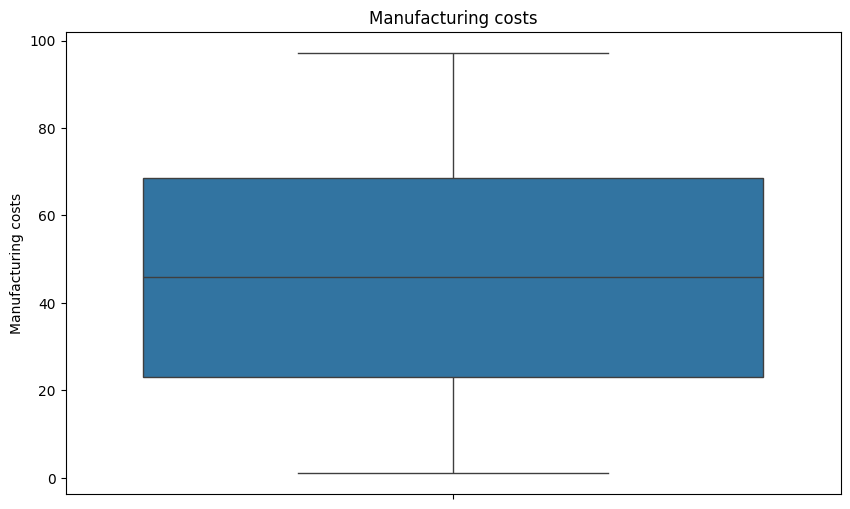

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'column_name' is the column you want to visualize
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(data['Manufacturing costs'])  # Set vert=False for horizontal box plot
plt.title('Manufacturing costs')  # Set the x-axis label
plt.show()  # Display the plot

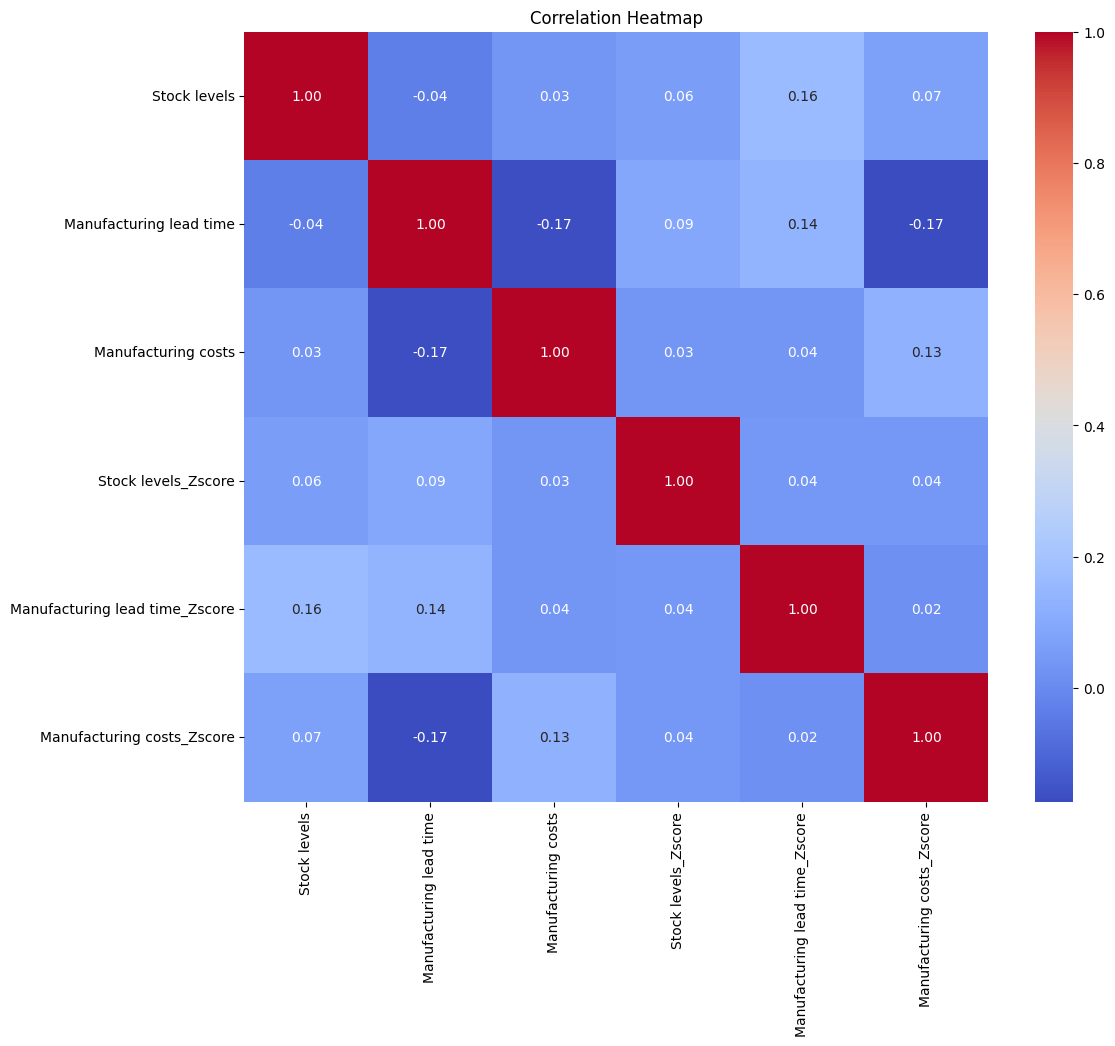

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and you want to visualize the correlation between numerical features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns  # Select numerical features
correlation_matrix = data[numerical_cols].corr()  # Calculate correlation matrix

plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Create heatmap
plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Display the plot

In [ ]:
fig = px.scatter(data, x="Price", y="Revenue generated", color="Product type", title="Revenue generated by product type", \
    hover_data = ["Number of products sold"])
fig.show()

In [ ]:
avg_lead_time = data.groupby("Product type")['Lead time'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean()).reset_index()
avg_lead_time

,Product type,Lead time
0,cosmetics,13.538462
1,haircare,18.705882
2,skincare,18.052632


In [ ]:
bar_lead_time = px.bar(avg_lead_time, x='Product type', y='Lead time', title='Average lead time')
bar_lead_time.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_features(df):

  # Select numerical features that are present in the DataFrame
  numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

  # Remove columns that are not supposed to be scaled
  remove_cols = ['SKU', 'Number of products sold', 'Lead time', 'Order quantities']
  numerical_features = [col for col in numerical_features if col not in remove_cols]

  # Create a scaler object (choose Standardization or Min-Max Scaling)
  scaler = StandardScaler()
  # scaler = MinMaxScaler()

  # Fit and transform the scaler on the numerical features
  df[numerical_features] = scaler.fit_transform(df[numerical_features])

  return df

# Example Usage:
# Assuming 'data' is your supply chain data DataFrame
df_scaled = scale_features(data)  # Pass the original 'data' DataFrame

print("Scaled Data:")
print(df_scaled)

Scaled Data:
   Product type    SKU        Price Availability Number of products sold  \
0      haircare   SKU0  69.80800554           55                     802   
1      skincare   SKU1  14.84352328           95                     736   
2      haircare   SKU2  11.31968329           34                     NAN   
3      skincare   SKU3  61.16334302           68                 Unknown   
4      skincare   SKU4  4.805496036           26                     871   
..          ...    ...          ...          ...                     ...   
95     haircare  SKU95  77.90392722           65                     672   
96    cosmetics  SKU96  24.42313142           29                     324   
97     haircare  SKU97  3.526111259           56                      62   
98     skincare  SKU98  19.75460487           43                     913   
99     haircare  SKU99   68.5178327           17                     627   

   Revenue generated Customer demographics  Stock levels Lead times  \
0  

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_features(df):
  # Select categorical features
  categorical_features = ['Product type', 'Supplier name', 'Shipping carriers',
                        'Transportation modes', 'Inspection results']

  # Create a OneHotEncoder object
  # Removed 'sparse=False' as it's no longer needed in newer versions of sklearn
  # Added sparse_output=False to ensure the output is a dense array
  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

  # Fit and transform the encoder on the categorical features
  encoded_features = encoder.fit_transform(df[categorical_features])

  # Create a new DataFrame with the encoded features
  encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

  # Concatenate the encoded features with the original DataFrame
  df_encoded = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)

  return df_encoded

# Example Usage:
# Assuming 'data' is your supply chain data DataFrame
# Use the original data DataFrame instead of 'df'
df_encoded = encode_categorical_features(data)  # Changed from df to data

print("Encoded Data:")
print(df_encoded)

Encoded Data:
      SKU        Price Availability Number of products sold Revenue generated  \
0    SKU0  69.80800554           55                     802       8661.996792   
1    SKU1  14.84352328           95                     736       7460.900065   
2    SKU2  11.31968329           34                     NAN       9577.749626   
3    SKU3  61.16334302           68                 Unknown               NAN   
4    SKU4  4.805496036           26                     871       2686.505152   
..    ...          ...          ...                     ...               ...   
95  SKU95  77.90392722           65                     672       7386.363944   
96  SKU96  24.42313142           29                     324       7698.424766   
97  SKU97  3.526111259           56                      62        4370.91658   
98  SKU98  19.75460487           43                     913        8525.95256   
99  SKU99   68.5178327           17                     627       9185.185829   

   Customer d

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_features(df):
  """
  Encodes categorical features in the supply chain DataFrame using One-Hot Encoding.

  Args:
    df: The pandas DataFrame containing the supply chain data.

  Returns:
    A DataFrame with encoded categorical features.
  """

  # Select categorical features
  categorical_features = ['Product type', 'Supplier name', 'Shipping carriers',
                        'Transportation modes', 'Inspection results']

  # Create a OneHotEncoder object
  # Removed 'sparse=False' as it's no longer needed in newer versions of sklearn
  # Added sparse_output=False to ensure the output is a dense array
  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

  # Check if all categorical features are present in the DataFrame
  missing_features = [f for f in categorical_features if f not in df.columns]
  if missing_features:
    raise KeyError(f"The following categorical features are missing: {missing_features}")


  # Fit and transform the encoder on the categorical features
  encoded_features = encoder.fit_transform(df[categorical_features])

  # Create a new DataFrame with the encoded features
  encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

  # Concatenate the encoded features with the original DataFrame
  df_encoded = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)

  return df_encoded

# Example Usage:
# Assuming 'data' is your supply chain data DataFrame, use 'data' instead of 'df'
df_encoded = encode_categorical_features(data)  # Pass the original 'data' DataFrame

print("Encoded Data:")
print(df_encoded)

Encoded Data:
      SKU        Price Availability Number of products sold Revenue generated  \
0    SKU0  69.80800554           55                     802       8661.996792   
1    SKU1  14.84352328           95                     736       7460.900065   
2    SKU2  11.31968329           34                     NAN       9577.749626   
3    SKU3  61.16334302           68                 Unknown               NAN   
4    SKU4  4.805496036           26                     871       2686.505152   
..    ...          ...          ...                     ...               ...   
95  SKU95  77.90392722           65                     672       7386.363944   
96  SKU96  24.42313142           29                     324       7698.424766   
97  SKU97  3.526111259           56                      62        4370.91658   
98  SKU98  19.75460487           43                     913        8525.95256   
99  SKU99   68.5178327           17                     627       9185.185829   

   Customer d

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

# Function to calculate mode
def get_mode(v):
    c = Counter(v)
    mode_count = c.most_common(1)[0][1]
    mode = [key for key, count in c.items() if count == mode_count]
    if len(mode) == len(v):
      return np.nan
    return mode[0]

# Assuming supply_chain_data is a pandas DataFrame

# Filter only numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Calculate summary statistics for each numeric variable
numeric_summary = {}
for col in numeric_data.columns:
    numeric_summary[col] = {
        'mean': np.mean(numeric_data[col]),
        'median': np.median(numeric_data[col]),
        'mode': get_mode(numeric_data[col]),
        'range': np.max(numeric_data[col]) - np.min(numeric_data[col]),
        'sd': np.std(numeric_data[col])
    }

# Convert the summary to a data frame
numeric_summary_df = pd.DataFrame(numeric_summary).T

print(numeric_summary_df)



                                        mean    median      mode     range  \
Stock levels                   -6.883383e-17 -0.005475  1.588762  3.124061   
Manufacturing lead time        -4.440892e-18 -0.095668 -0.892904  3.188942   
Manufacturing costs            -3.358425e-16 -0.045543  1.735851  3.340576   
Stock levels_Zscore             1.709743e-16  0.121133  0.997790  3.246875   
Manufacturing lead time_Zscore -4.996004e-16  0.025207  0.025207  3.580607   
Manufacturing costs_Zscore      2.620126e-16 -0.072933       NaN  3.488244   

                                 sd  
Stock levels                    1.0  
Manufacturing lead time         1.0  
Manufacturing costs             1.0  
Stock levels_Zscore             1.0  
Manufacturing lead time_Zscore  1.0  
Manufacturing costs_Zscore      1.0  


In [ ]:

import pandas as pd
import numpy as np
from collections import Counter

# Function to calculate mode
def get_mode(v):
    c = Counter(v)
    mode_count = c.most_common(1)[0][1]
    mode = [key for key, count in c.items() if count == mode_count]
    if len(mode) == len(v):
      return np.nan
    return mode[0]

# Assuming supply_chain_data is a pandas DataFrame


# Filter only numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Calculate summary statistics for each numeric variable
numeric_summary = {}
for col in numeric_data.columns:
    numeric_summary[col] = {
        'mean': np.mean(numeric_data[col]),
        'median': np.median(numeric_data[col]),
        'mode': get_mode(numeric_data[col]),
        'range': np.max(numeric_data[col]) - np.min(numeric_data[col]),
        'sd': np.std(numeric_data[col])
    }

# Calculate summary statistics for each numeric variable using Pandas
numeric_summary = numeric_data.agg(['mean', 'median', get_mode,
                                     lambda x: x.max() - x.min(), 'std'])

# Transpose and rename columns for better readability
numeric_summary_df = numeric_summary.T.rename(
    columns={'<lambda_0>': 'range', 'get_mode': 'mode'}
)
print(numeric_summary_df)


                                        mean    median      mode  <lambda>  \
Stock levels                   -6.883383e-17 -0.005475  1.588762  3.124061   
Manufacturing lead time        -4.440892e-18 -0.095668 -0.892904  3.188942   
Manufacturing costs            -3.358425e-16 -0.045543  1.735851  3.340576   
Stock levels_Zscore             1.709743e-16  0.121133  0.997790  3.246875   
Manufacturing lead time_Zscore -4.996004e-16  0.025207  0.025207  3.580607   
Manufacturing costs_Zscore      2.620126e-16 -0.072933       NaN  3.488244   

                                     std  
Stock levels                    1.005038  
Manufacturing lead time         1.005038  
Manufacturing costs             1.005038  
Stock levels_Zscore             1.005038  
Manufacturing lead time_Zscore  1.005038  
Manufacturing costs_Zscore      1.005038  


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Separate numeric and categorical features
numeric_features = data.select_dtypes(include=np.number)
categorical_features = data.select_dtypes(exclude=np.number)
# Apply KNN Imputer to numeric features only
data_imputer = KNNImputer(n_neighbors=5)
imputed_numeric = data_imputer.fit_transform(numeric_features)
imputed_numeric_df = pd.DataFrame(imputed_numeric, columns=numeric_features.columns, index=data.index)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for pandas DataFrame
encoded_categorical = encoder.fit_transform(categorical_features)
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features.columns), index=data.index)

# Concatenate imputed numeric and encoded categorical features
data_cleaned = pd.concat([imputed_numeric_df, encoded_categorical_df], axis=1)

# Check for missing values
print("Missing Values After Imputation:")
print(data_cleaned.isnull().sum())

Missing Values After Imputation:
Stock levels                      0
Manufacturing lead time           0
Manufacturing costs               0
Stock levels_Zscore               0
Manufacturing lead time_Zscore    0
                                 ..
Costs_990.0784725                 0
Costs_995.9294615                 0
Costs_996.778315                  0
Costs_997.4134501                 0
Costs_NAN                         0
Length: 1029, dtype: int64


In [ ]:
from sklearn.ensemble import IsolationForest
# Detecting outliers
iso = IsolationForest(contamination=0.01, random_state=42)
# Instead of dropping 'target', fit the model on all columns except 'Anomaly' if it exists
data_cleaned['Anomaly'] = iso.fit_predict(data_cleaned.drop(columns=['Anomaly'], errors='ignore'))
data_cleaned = data_cleaned[data_cleaned['Anomaly'] == 1].drop(columns=['Anomaly'])
print(f"Number of Outliers Removed: {len(data) - len(data_cleaned)}")

Number of Outliers Removed: 1


In [ ]:
from imblearn.over_sampling import SMOTE

# Balancing the data
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='minority')

# Check if 'target' column exists in data_cleaned
if 'target' in data_cleaned.columns:
    X_resampled, y_resampled = smote.fit_resample(data_cleaned.drop(columns=['target']), data_cleaned['target'])
    print(f"Class Distribution After SMOTE: {pd.Series(y_resampled).value_counts()}")
else:
    print("Target column not found in data_cleaned DataFrame. Please check your data processing steps.")

Target column not found in data_cleaned DataFrame. Please check your data processing steps.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Check if 'target' column exists in data_cleaned, if not, create a dummy target
if 'target' not in data_cleaned.columns:
    # Define a target column (replace with your desired target)
    # For demonstration, we create a random binary target
    data_cleaned['target'] = np.random.randint(0, 2, size=len(data_cleaned))
    print("Dummy 'target' column created for demonstration.")

# Balancing the data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(data_cleaned.drop(columns=['target']), data_cleaned['target'])
print(f"Class Distribution After SMOTE: {pd.Series(y_resampled).value_counts()}")

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=54)

# Decision Tree Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

Dummy 'target' column created for demonstration.
Class Distribution After SMOTE: target
1    52
0    52
Name: count, dtype: int64
Accuracy: 0.55


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Check if a suitable target column exists, otherwise, create a dummy for demonstration
target_column = 'Inspection results'  # Or another relevant categorical column

# If the target column is categorical, encode it for SMOTE
if target_column in data_cleaned.columns and data_cleaned[target_column].dtype == 'object':
    # If the column is of object type, likely categorical, label encode it
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data_cleaned[target_column] = le.fit_transform(data_cleaned[target_column])
elif target_column not in data_cleaned.columns:
    # You might need to define a logic for creating your target variable
    # Here's a placeholder, replace with your specific logic
    data_cleaned[target_column] = np.random.randint(0, 2, size=len(data_cleaned))
    print(f"Dummy '{target_column}' column created for demonstration.")

# Balancing the data using SMOTE
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(data_cleaned.drop(columns=[target_column]), data_cleaned[target_column])
print(f"Class Distribution After SMOTE: {pd.Series(y_resampled).value_counts()}")

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

Dummy 'Inspection results' column created for demonstration.
Class Distribution After SMOTE: Inspection results
0    58
1    58
Name: count, dtype: int64
Accuracy: 0.50


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using a more powerful model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_cleaned' is your preprocessed DataFrame

# 1. Feature Engineering:
# Consider creating new features or transforming existing ones to improve model accuracy.
# Example: If you have 'Raw Material Cost' and 'Labor Cost', you could create a 'Total Cost' feature.

# 2. Target Variable:
# Ensure 'Manufacturing costs' is your target variable and it's numeric.
if 'Manufacturing costs' not in data_cleaned.columns:
    # If it's not present, you'll need to create it or select a different target.
    print("Target column 'Manufacturing costs' not found. Please ensure it's present and numeric.")
else:
    # 3. Data Splitting:
    X = data_cleaned.drop(columns=['Manufacturing costs'])
    y = data_cleaned['Manufacturing costs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Feature Scaling:
    # Scale numerical features to improve model performance.
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 5. Model Selection and Training:
    # Using RandomForestRegressor, a more robust model for regression tasks.
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)

    # 6. Predictions and Evaluation:
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.26
R-squared: -0.23


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Check if 'Defect rates' column exists in data_cleaned
if 'Defect rates' in data_cleaned.columns:
    # Splitting data
    X = data_cleaned.drop(columns=['Defect rates'])  # Assuming 'Defect rates' is the target
    y = data_cleaned['Defect rates']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Decision Tree Model
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X_train, y_train)

    # Predictions
    predictions = model.predict(X_test)
    print(f"Decision Tree Accuracy: {accuracy_score(y_test, predictions):.2f}")
else:
    print("Column 'Defect rates' not found in data_cleaned DataFrame. Please check your data processing steps.")

Column 'Defect rates' not found in data_cleaned DataFrame. Please check your data processing steps.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # Import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Import regression metrics

# Splitting data
X = data_cleaned.drop(columns=['Manufacturing costs'])  # Assuming 'Defect rates' is the target
y = data_cleaned['Manufacturing costs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model - Use Regressor for continuous target
model = DecisionTreeRegressor(max_depth=3)  # Changed to DecisionTreeRegressor
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.43
R-squared: -0.39


In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Import Regressor
from sklearn.metrics import mean_squared_error, r2_score  # Import regression metrics

# Random Forest Regressor
clf = RandomForestRegressor(
    random_state=42,
    n_estimators=30,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    n_jobs=-1,
    max_samples=0.8,
    warm_start=True
)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate using regression metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.18
R-squared: -0.15


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, roc_auc_score



# Handle missing values with KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(exclude=['object'])),
                          columns=data.select_dtypes(exclude=['object']).columns)

# Add categorical columns back
for col in data.select_dtypes(include=['object']).columns:
    data_imputed[col] = data[col]

# Standardize numerical data
scaler = StandardScaler()
num_cols = data_imputed.select_dtypes(exclude=['object']).columns
data_imputed[num_cols] = scaler.fit_transform(data_imputed[num_cols])

# Encode categorical variables
encoder = LabelEncoder()
cat_cols = data_imputed.select_dtypes(include=['object']).columns
for col in cat_cols:
    data_imputed[col] = encoder.fit_transform(data_imputed[col])

# Convert "Defect rates" to categorical bins
data_imputed["Defect Category"] = pd.qcut(data_imputed["Defect rates"], q=3, labels=["Low", "Medium", "High"])
data_imputed["Defect Category"] = encoder.fit_transform(data_imputed["Defect Category"])

# Define features and target
X = data_imputed.drop(columns=["Defect rates", "Defect Category"])
y = data_imputed["Defect Category"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Compute metrics
dt_report = classification_report(y_test, dt_predictions, output_dict=True)
rf_report = classification_report(y_test, rf_predictions, output_dict=True)

# Compute ROC AUC Score
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class="ovr")
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class="ovr")

# Print results
metrics = {
    "Decision Tree": {
        "Accuracy": dt_report["accuracy"],
        "Precision": dt_report["weighted avg"]["precision"],
        "Recall": dt_report["weighted avg"]["recall"],
        "ROC AUC": dt_roc_auc
    },
    "Random Forest": {
        "Accuracy": rf_report["accuracy"],
        "Precision": rf_report["weighted avg"]["precision"],
        "Recall": rf_report["weighted avg"]["recall"],
        "ROC AUC": rf_roc_auc
    }
}

print(metrics)

{'Decision Tree': {'Accuracy': 0.35, 'Precision': 0.346969696969697, 'Recall': 0.35, 'ROC AUC': 0.5187397787397787}, 'Random Forest': {'Accuracy': 0.45, 'Precision': 0.65, 'Recall': 0.45, 'ROC AUC': 0.5868494468494468}}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=16, random_state=56)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.30


Decision Tree Accuracy: 0.46
Random Forest Accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.56      0.91      0.69        11

    accuracy                           0.62        24
   macro avg       0.69      0.65      0.61        24
weighted avg       0.71      0.62      0.60        24



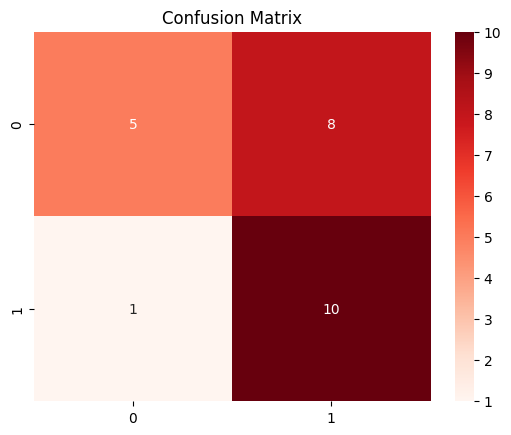


ROC AUC Score: 0.68


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['number']).columns
# Encode categorical variables (Label Encoding for binary, One-Hot Encoding for others)
label_encoders = {}
for col in categorical_cols:
  if data[col].nunique() == 2:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
  else:
    data = pd.get_dummies(data, columns=[col], drop_first=True)
# Handle Missing Values
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
# Outlier Detection
iso = IsolationForest(contamination=0.01, random_state=42)
data_imputed['Anomaly'] = iso.fit_predict(data_imputed.drop(columns=['Manufacturing costs']))
data_cleaned = data_imputed[data_imputed['Anomaly'] == 1].drop(columns=['Anomaly'])
# Address Class Imbalance

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Decision Tree Model
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(X_train, y_train)
predictions_dt = model_dt.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, predictions_dt):.2f}")
# Random Forest Model
model_rf = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, predictions_rf):.2f}")
# Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, predictions_rf))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.show()
# ROC AUC Score
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Score: {roc_auc:.2f}")

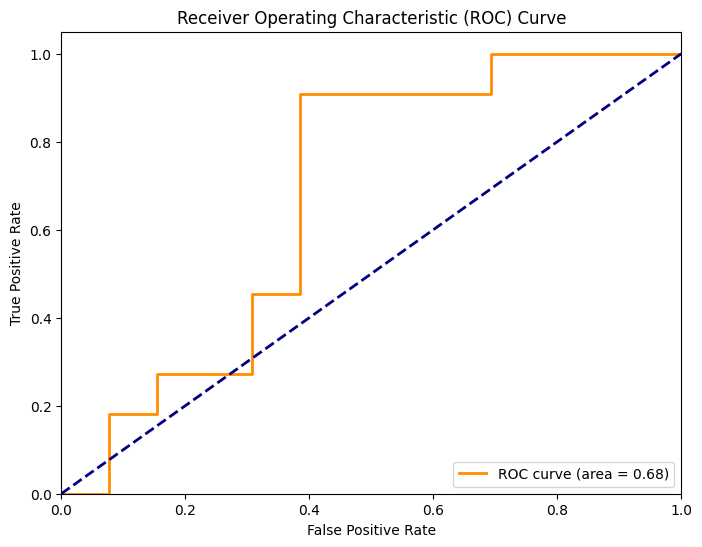

In [ ]:
# prompt: ROC Curve: Displays the trade-off between true positive and false positive rates
# across all models.

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and model_rf (RandomForestClassifier) are defined from the previous code

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
original_data = pd.read_csv("Supply_Chain_Dataset.csv")

# Create the pie chart using the original DataFrame
transportation_chart = px.pie(original_data,
                              values='Costs',
                              names='Transportation modes',
                              title='Cost Distribution by Transportation Mode',
                              hole=0.5,
                              color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.show()

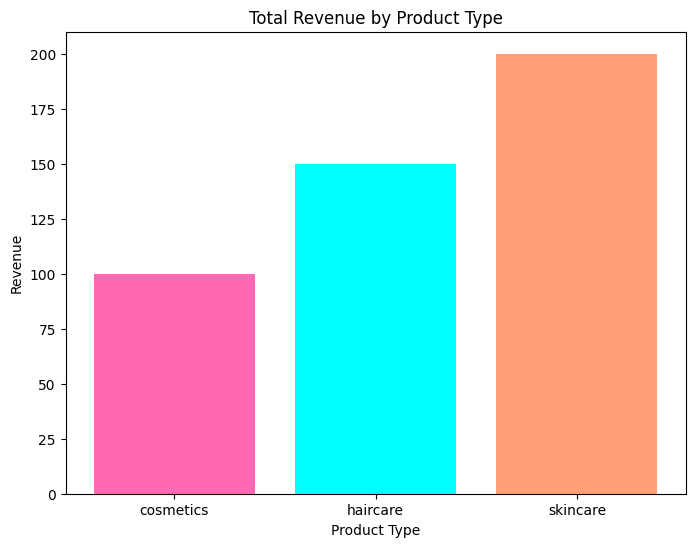

In [ ]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Example plot generation
# Assuming data is available in a dataframe called 'data' (renamed from 'df')
data = pd.DataFrame({'product_type': ['cosmetics', 'haircare', 'skincare'], 'revenue': [100, 150, 200]})

# Define custom colors for product type
my_colors = {"cosmetics": "hotpink", "haircare": "cyan", "skincare": "lightsalmon"}

# Create bar plot using matplotlib
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(data['product_type'], data['revenue'], color=[my_colors[p] for p in data['product_type']])
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Revenue')
plt.show()


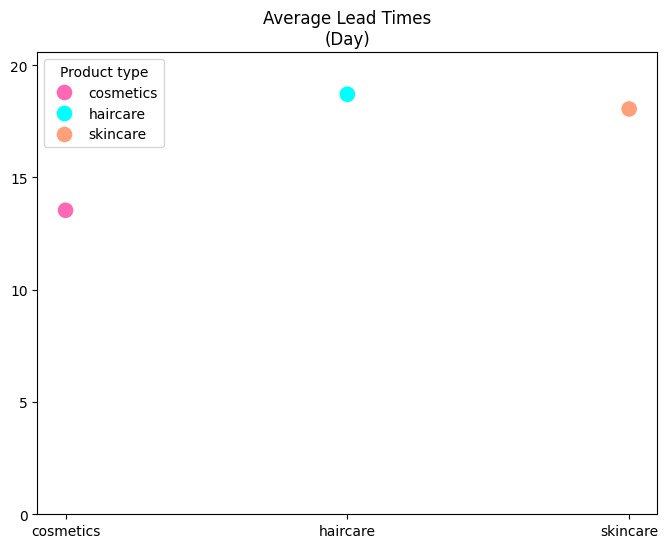

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'original_data' is your DataFrame
# and contains 'Product type' and 'Lead time' columns

# Convert 'Lead time' to numeric, handling errors
original_data['Lead time'] = pd.to_numeric(original_data['Lead time'], errors='coerce')

# Calculate average lead times by product type
average_lead_times = original_data.groupby('Product type')['Lead time'].mean().reset_index()

# Rename columns to match the R code (optional, for clarity)
average_lead_times.columns = ['Product type', 'Average Lead Times']

# Define custom colors for product type
my_colors = {"cosmetics": "hotpink", "haircare": "cyan", "skincare": "lightsalmon"}

# Create scatter plot using seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x='Product type', y='Average Lead Times', data=average_lead_times,
                s=150,  # Adjust marker size (equivalent to size = 8 in ggplot)
                hue='Product type',  # Color by product type
                palette=my_colors)  # Use custom colors

plt.title("Average Lead Times\n(Day)")
plt.xlabel("")  # Remove x-axis label
plt.ylabel("")  # Remove y-axis label

# Set y-axis limits and breaks (similar to scale_y_continuous in ggplot)
max_lead_time = average_lead_times['Average Lead Times'].max()
plt.ylim(0, max_lead_time * 1.1)  # Set upper limit to 110% of max
plt.yticks(range(0, int(max_lead_time * 1.1) + 5, 5))  # Adjust breaks accordingly


# Save the plot
plt.savefig("1-3 Average_Lead_Times_by_Product_Type.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Load your original DataFrame (if necessary)
original_data = pd.read_csv("Supply_Chain_Dataset.csv")  # Replace "Supply_Chain_Dataset.csv" with your actual file name

# If you've processed 'original_data', copy it to 'data' for consistency
data = original_data.copy()

# Convert 'Defect rates' to numeric, handling errors
data['Defect rates'] = pd.to_numeric(data['Defect rates'], errors='coerce')

# Then, proceed with your groupby and mean calculation
trans = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()
trans_chart = px.pie(trans, values='Defect rates',
                    names='Transportation modes',
                    title='Defect Rates by Transportation Mode',
                    hole=0.5,
                    color_discrete_sequence=px.colors.qualitative.Pastel)
trans_chart.update_traces(textposition='inside', textinfo='label+percent')
trans_chart.show()

In [6]:
!pip install dash
import pandas as pd
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px

# Perform basic validation
data['Missing Values'] = data.isnull().sum(axis=1)
data['Duplicates'] = data.duplicated()

# Standardization (Example: Converting column names to lowercase)
data.columns = data.columns.str.lower().str.replace(" ", "_")

# Create Dash app
app = dash.Dash(_name_)

app.layout = html.Div([
    html.H1("AI-Powered Data Validation & Standardization"),

    # Table to show raw data
    html.H3("Raw Data"),
    dash_table.DataTable(
        data=data.head(10).to_dict('records'),
        columns=[{"name": i, "id": i} for i in data.columns],
        page_size=10
    ),

    # Data Validation Summary
    html.H3("Validation Summary"),
    dash_table.DataTable(
        data=pd.DataFrame({
            "Missing Values": [data.isnull().sum().sum()],
            "Duplicate Rows": [data.duplicated().sum()]
        }).to_dict('records'),
        columns=[{"name": i, "id": i} for i in ["Missing Values", "Duplicate Rows"]]
    ),

    # Standardization: Before and After (Example)
    html.H3("Standardization Example"),
    html.P("Column Names Standardized (Lowercase, Underscores)"),
    html.Pre(str(data.columns.tolist())),

    # Anomaly Detection (Example: Outlier in a Numerical Column)
    html.H3("Anomaly Detection"),
    dcc.Dropdown(
        id="num_column",
        options=[{"label": col, "value": col} for col in data.select_dtypes(include=['number']).columns],
        value=data.select_dtypes(include=['number']).columns[0] if not data.select_dtypes(include=['number']).empty else None,
        placeholder="Select a numerical column"
    ),
    dcc.Graph(id="boxplot")
])

@app.callback(
    Output("boxplot", "figure"),
    Input("num_column", "value")
)
def update_graph(selected_col):
    if selected_col:
        fig = px.box(data, y=selected_col, title=f"Outlier Detection in {selected_col}")
        return fig
    return {}

# Run the app
if _name_ == '_main_':
    app.run_server(debug=True)

NameError: name '_name_' is not defined

In [8]:
!pip install dash
import pandas as pd
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import plotly.express as px

# Perform basic validation
data['Missing Values'] = data.isnull().sum(axis=1)
data['Duplicates'] = data.duplicated()

# Standardization (Example: Converting column names to lowercase)
data.columns = data.columns.str.lower().str.replace(" ", "_")

# Create Dash app
# Changed _name_ to '__main__'
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("AI-Powered Data Validation & Standardization"),

    # Table to show raw data
    html.H3("Raw Data"),
    dash_table.DataTable(
        data=data.head(10).to_dict('records'),
        columns=[{"name": i, "id": i} for i in data.columns],
        page_size=10
    ),

    # Data Validation Summary
    html.H3("Validation Summary"),
    dash_table.DataTable(
        data=pd.DataFrame({
            "Missing Values": [data.isnull().sum().sum()],
            "Duplicate Rows": [data.duplicated().sum()]
        }).to_dict('records'),
        columns=[{"name": i, "id": i} for i in ["Missing Values", "Duplicate Rows"]]
    ),

    # Standardization: Before and After (Example)
    html.H3("Standardization Example"),
    html.P("Column Names Standardized (Lowercase, Underscores)"),
    html.Pre(str(data.columns.tolist())),

    # Anomaly Detection (Example: Outlier in a Numerical Column)
    html.H3("Anomaly Detection"),
    dcc.Dropdown(
        id="num_column",
        options=[{"label": col, "value": col} for col in data.select_dtypes(include=['number']).columns],
        value=data.select_dtypes(include=['number']).columns[0] if not data.select_dtypes(include=['number']).empty else None,
        placeholder="Select a numerical column"
    ),
    dcc.Graph(id="boxplot")
])

@app.callback(
    Output("boxplot", "figure"),
    Input("num_column", "value")
)
def update_graph(selected_col):
    if selected_col:
        fig = px.box(data, y=selected_col, title=f"Outlier Detection in {selected_col}")
        return fig
    return {}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<ipython-input-8-415ef897ff9a>:25: UserWarning:

DataFrame columns are not unique, some columns will be omitted.



<IPython.core.display.Javascript object>